# 13wk-57: House Prices / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-x-PYcds3K7ck8ELQyVlVoN&si=ZCdvUB2r4dQ7cnQx>

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

ref:
<https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview>

In [9]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

2023-12-03 17:55:21,603 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ffac6ef7e50>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/data/download-all/house-prices-advanced-regression-techniques
2023-12-03 17:55:41,625 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ffac6f67b50>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/data/download-all/house-prices-advanced-regression-techniques
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 873kB/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 872kB/s]


In [10]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
df_submission = pd.read_csv("sample_submission.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [12]:
!rm sample_submission.csv
!rm train.csv
!rm test.csv
!rm data_description.txt
!rm house-prices-advanced-regression-techniques.zip

# 4. 적합

In [13]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [14]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='SalePrice')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)
yyhat = predictr.predict(df_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20231203_085611/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231203_085611/"
AutoGluon Version:  0.8.2
Python Version:     3.8.18
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   673.14 GB / 982.82 GB (68.5%)
Train Data Rows:    1460
Train Data Columns: 80
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting 

[1000]	valid_set's rmse: 27505.1
[2000]	valid_set's rmse: 27240.4
[3000]	valid_set's rmse: 27201.5
[4000]	valid_set's rmse: 27197.3
[5000]	valid_set's rmse: 27197.2


	-27196.7065	 = Validation score   (-root_mean_squared_error)
	2.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29499.8
[2000]	valid_set's rmse: 28896.4
[3000]	valid_set's rmse: 28752.1
[4000]	valid_set's rmse: 28705.7
[5000]	valid_set's rmse: 28695.2
[6000]	valid_set's rmse: 28693
[7000]	valid_set's rmse: 28692.5
[8000]	valid_set's rmse: 28692.3
[9000]	valid_set's rmse: 28692.3
[10000]	valid_set's rmse: 28692.3


	-28692.2871	 = Validation score   (-root_mean_squared_error)
	4.74s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32785.3519	 = Validation score   (-root_mean_squared_error)
	0.32s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: CatBoost ...
	-28465.6966	 = Validation score   (-root_mean_squared_error)
	40.81s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-32045.9062	 = Validation score   (-root_mean_squared_error)
	0.25s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-33846.1211	 = Validation score   (-root_mean_squared_error)
	1.29s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-27778.2437	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-36076.0341	 = Validation score   (-root_mean_squared_error)
	2.19s	 = Training   runt

[1000]	valid_set's rmse: 32134.9
[2000]	valid_set's rmse: 32087.8
[3000]	valid_set's rmse: 32084.2
[4000]	valid_set's rmse: 32084.2
[5000]	valid_set's rmse: 32084.2


	-32084.1712	 = Validation score   (-root_mean_squared_error)
	7.34s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-26322.571	 = Validation score   (-root_mean_squared_error)
	0.16s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 60.9s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20231203_085611/")


# 5. 제출

In [15]:
df_submission['SalePrice'] = yyhat 
df_submission.to_csv("submission.csv",index=False)

In [16]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "오토글루온을 이용하여 첫제출"
!rm submission.csv

2023-12-03 17:57:33,818 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fa3d47a6670>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/house-prices-advanced-regression-techniques/submissions/url/21630/1701593833
2023-12-03 17:57:53,838 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fa3d47cfd90>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/house-prices-advanced-regression-techniques/submissions/url/21630/1701593833
  0%|                                               | 0.00/21.1k [00:00<?, ?B/s]2023-12-03 17:58:14,283 WARNING Retrying (Retry(total=9, connect=None, read=None, redirect=None, sta

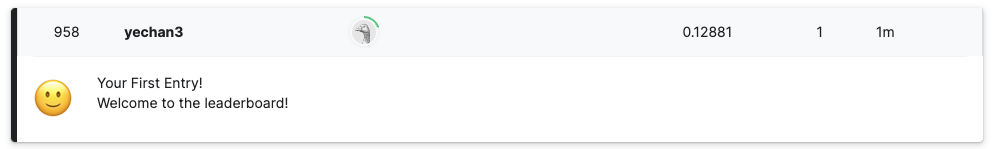

In [17]:
958/4955

0.19334006054490413

나쁘지 않은 순위..

# 6. 해석 및 시각화 (HW)

`-` 변수들중에서 `SalePrice`를 예측하기에 적절한 변수들을 조사해볼것.

In [18]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


No path specified. Models will be saved in: "AutogluonModels/ag-20231203_090647/"


### Model Prediction for SalePrice

Using validation data for `Test` points

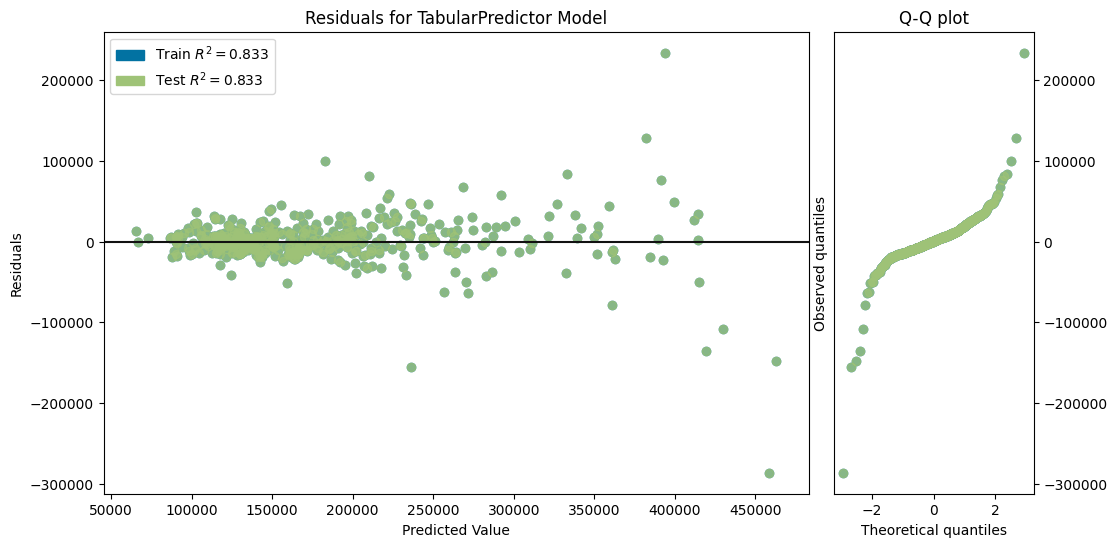

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-30529.412291,-32535.182194,0.007812,0.006692,0.236226,0.007812,0.006692,0.236226,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,11716.915326,705.955990,1.573763e-06,5,13170.488468,10263.342185
GrLivArea,6071.089919,394.407430,2.125470e-06,5,6883.180269,5258.999569
GarageCars,3209.379857,372.418575,2.137296e-05,5,3976.194851,2442.564863
BsmtFinSF1,2719.389615,125.895615,5.496647e-07,5,2978.610426,2460.168805
TotalBsmtSF,2187.752068,328.342663,5.909712e-05,5,2863.814149,1511.689987
1stFlrSF,1688.228494,248.951746,5.513520e-05,5,2200.823579,1175.633408
Neighborhood,1534.658374,377.814804,4.073284e-04,5,2312.584278,756.732471
HalfBath,881.236830,353.675558,2.542584e-03,5,1609.459692,153.013968
2ndFlrSF,872.631138,123.229525,4.647906e-05,5,1126.362433,618.899844
Fireplaces,868.173697,364.469844,2.989959e-03,5,1618.622144,117.725249


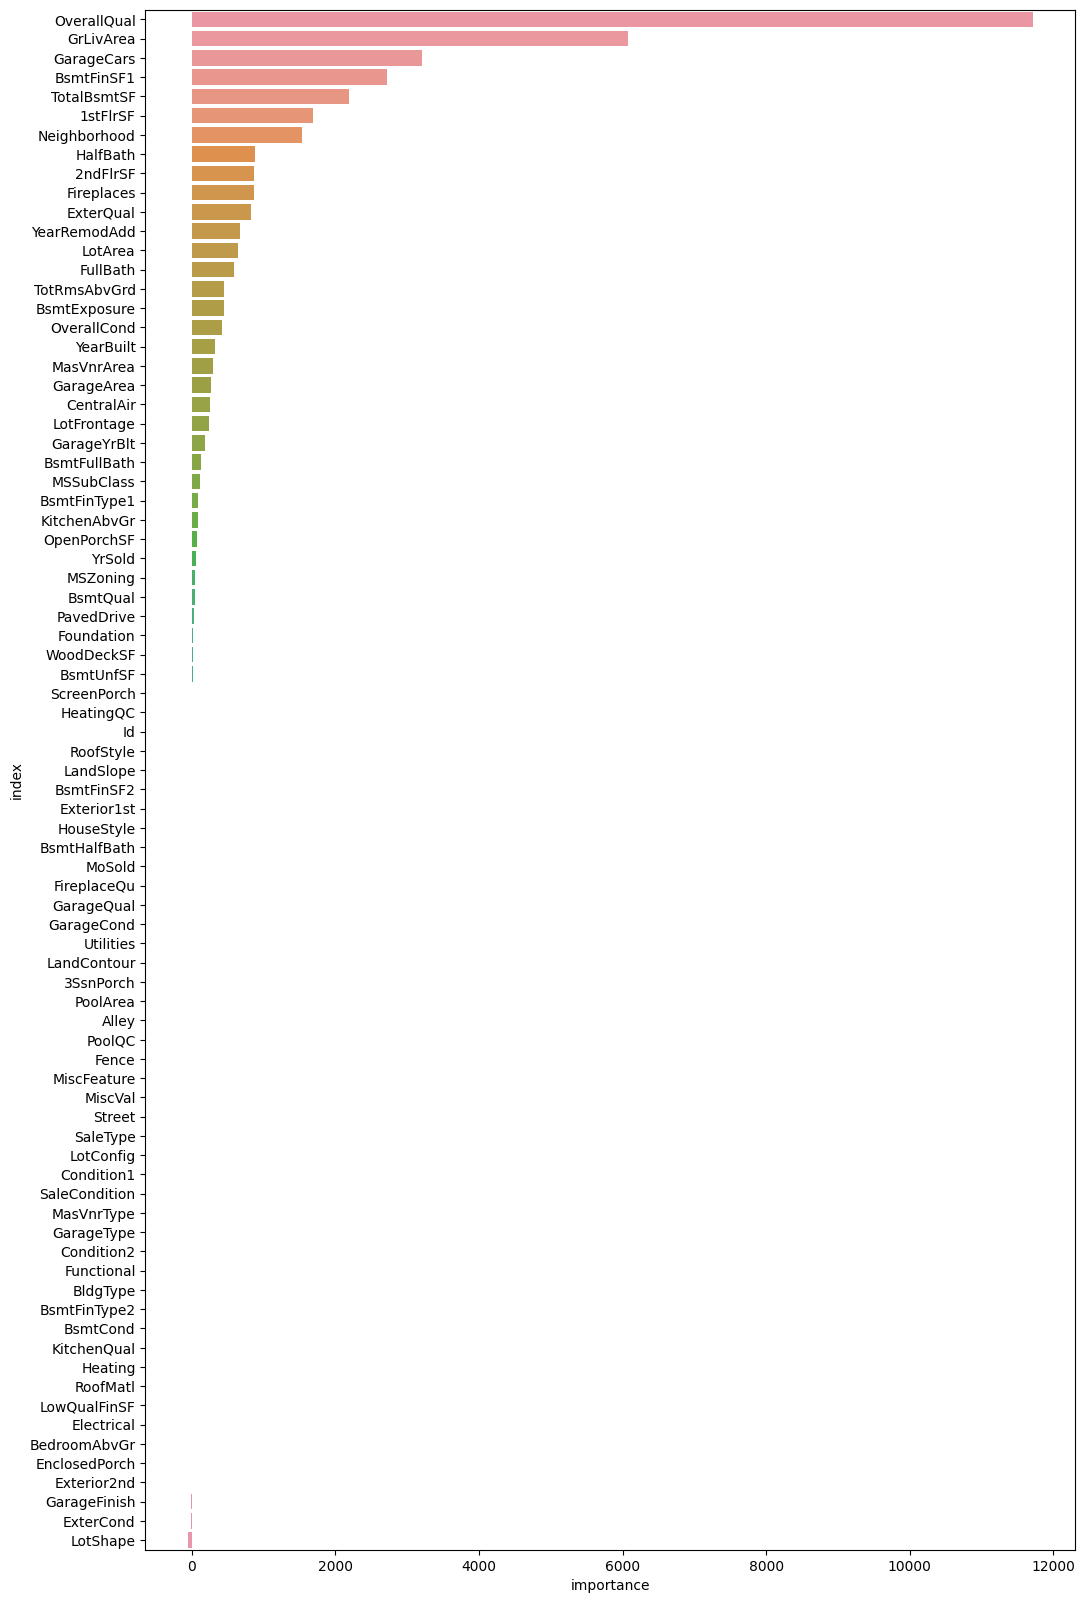

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,error
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,458492.125000,286507.875000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,394141.625000,234141.625000
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,0,10,2007,New,Partial,392000,236151.000000,155849.000000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2010,New,Partial,611657,463175.906250,148481.093750
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Normal,555000,419354.593750,135645.406250
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2009,New,Partial,253293,382104.968750,128811.968750
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,538000,429698.281250,108301.718750
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Family,82500,182936.734375,100436.734375
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,333203.062500,83203.062500
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Abnorml,129000,210298.609375,81298.609375


In [19]:
auto.quick_fit(
    train_data=df_train,
    label='SalePrice',
    show_feature_importance_barplots=True
)

In [20]:
df_train.iloc[[1]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [21]:
predictr.predict(df_train.iloc[[1]])

1    170013.546875
Name: SalePrice, dtype: float32

In [ ]:
# auto.explain_rows(
#     train_data=df_train,
#     model=predictr,
#     rows=df_train.iloc[[1]],
#     display_rows=True,
#     plot='waterfall'
# )

> chatGPT의 변수에 대한 설명
>
>이 데이터는 Kaggle의 "House Prices - Advanced Regression Techniques" 대회에서 사용되는 데이터로, 주택 판매 가격을 예측하는 문제입니다. 아래는 데이터에 있는 변수들에 대한 설명입니다.
>
>1. **SalePrice (판매 가격):** 주택의 판매 가격 (예측하려는 대상 변수)
>
>2. **MSSubClass (건물 종류):** 건물의 종류를 나타내는 코드
>
>3. **MSZoning (일반 분류):** 일반적인 구역 분류
>
>4. **LotFrontage (부동산에 연결된 도로의 선형 길이):** 주택과 연결된 도로의 길이
>
>5. **LotArea (부지 면적):** 부지의 면적 (제곱 피트)
>
>6. **Street (도로 접근 유형):** 도로 접근 유형 (포장 도로 등)
>
>7. **Alley (골목 접근 유형):** 골목 접근 유형
>
>8. **LotShape (부지의 일반적인 모양):** 부지의 모양
>
>9. **LandContour (부지의 평평함):** 부지의 평평함 정도
>
>10. **Utilities (사용 가능한 유틸리티 유형):** 사용 가능한 유틸리티의 유형
>
>11. **LotConfig (부지 구성):** 부지의 구성
>
>12. **LandSlope (부지 경사):** 부지의 경사
>
>13. **Neighborhood (Ames 시 한계 내의 물리적 위치):** 물리적 위치
>
>14. **Condition1 (주요 도로 또는 철도와의 근접성):** 주요 도로 또는 철도와의 근접성
>
>15. **Condition2 (주요 도로 또는 철도와의 근접성(두 번째)):** 두 번째로 주어진 경우의 주요 도로 또는 철도와의 근접성
>
>16. **BldgType (주거 형태):** 주거 형태
>
>17. **HouseStyle (주택 스타일):** 주택 스타일
>
>18. **OverallQual (전체 자재 및 마감 품질):** 전반적인 자재 및 마감 품질
>
>19. **OverallCond (전반적인 상태 등급):** 전반적인 상태 등급
>
>20. **YearBuilt (원래 건설 날짜):** 원래 건설된 연도
>
>... 그 외에도 다양한 주택 특징 및 설명이 포함되어 있습니다.
>
>이 변수들은 각각 주택에 대한 다양한 특징을 설명하고 있으며, 이러한 특징을 사용하여 각 주택의 판매 가격을 예측하는 것이 목표입니다.